<div style="border:solid green 2px; padding: 20px">
<b>Iteration - 1</b><br>
<b>Reviewer’s comments</b><br>


Hello Jimmy!,
  
I am Alexangel, your reviewer in this first iteration,
  
Another project successfully completed - well done! 🏆 Your consistent effort and progress are truly commendable.

Our team is here to help you keep pushing forward and honing your skills as you advance through the program.

You can contact me via Tripleten Hub for further feedback. This information is described below.

**What Was Great**:
- Excellent job on following the structure of the project.
- You’ve shown strong skills in building the neural network in this project.

**Tips for Future Projects**:
- Consider adding brief comments after the analysis or graph of every dataframe to make your work even more integral.

</div>

-------------------------------------------------------------------------------------------------------------

***Name of the reviewer***: Alexangel Bracho

***Reviewer’s Tripleten Hub link*** : [reviewer's link](https://hub.tripleten.com/u/6b1cbe37)

-------------------------------------------------------------------------------------------------------------


## Part 1: Data Loading and Exploration

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/TripleTen-DS/Dataset/refs/heads/main/insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
print(df['charges'].describe())

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


In [7]:

# Check how many smokers vs non-smokers
print(df['smoker'].value_counts())

# Check the regions
print(df['region'].value_counts())


no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


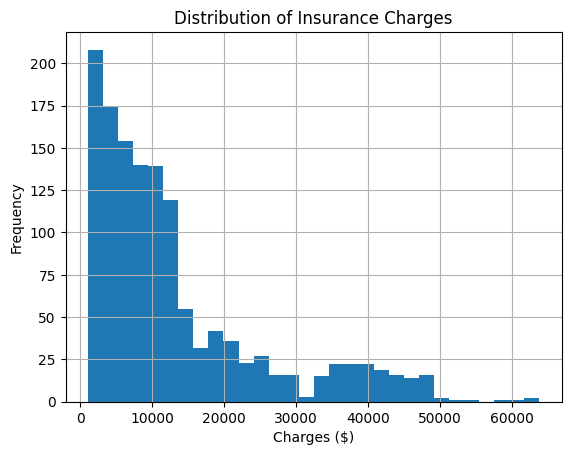

In [8]:

df['charges'].hist(bins=30)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.show()


### **1.1 Dataset Overview**
* **Dimensions:** The dataset contains **1,338 observations** and **7 variables** (6 features and 1 target).
* **Variable Composition:**
    * **Categorical:** `sex`, `smoker`, `region` (Object).
    * **Discrete Numerical:** `age`, `children` (int64).
    * **Continuous Numerical:** `bmi`, `charges` (float64).
* **Data Integrity:** A check for null values confirmed **zero missing entries**, requiring no imputation before processing.

### **1.2 Statistical Summary of Charges**
* **Average Cost:** The mean insurance charge is approximately **$13,270**, but the high standard deviation (~$12,110) indicates massive variability.
* **Skewness:** The target variable `charges` is heavily **right-skewed**. While the median (50th percentile) is roughly **9,382**, the maximum value reaches **63,770** dollars.
* **Outlier Detection:** The histogram reveals a long "tail," suggesting that while the majority of patients incur low costs, a subset of high-risk individuals drives the upper end of the distribution.



### **1.3 Key Driver Identification**
* **The Smoking Gap:** Non-smokers (**1,064**) significantly outnumber smokers (**274**). In insurance modeling, this is a critical "discriminator" because smoking often correlates with the high-cost outliers seen in the distribution.
* **Regional Balance:** The data is distributed relatively evenly across four regions (Southwest, Southeast, Northwest, Northeast), ensuring the model won't be biased toward a specific geographic location.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great work with the preview of the data. Also with the comments.

</div>

## Part 2: Data Preprocessing

In [9]:
# Use OHE for the categorical features
df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Preview the new columns
df_processed.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [10]:
X = df_processed.drop('charges', axis=1)
y = df_processed['charges']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1070
Testing set size: 268


In [11]:

# Initialize Scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


## Part 2: Data Preprocessing Summary

* **Categorical Variable Handling:** We used **One-Hot Encoding** for the `sex`, `smoker`, and `region` features. By using `drop_first=True`, we represented $N$ categories with $N-1$ columns, which prevents multicollinearity (the dummy variable trap).
* **Data Splitting:** The data was divided into a **Training Set (80%)** and a **Testing Set (20%)**. This split was performed **before normalization** to ensure no information from the test set influenced the training process (preventing data leakage).
* **Numerical Feature Scaling:** We applied `StandardScaler` to our features (`age`, `bmi`, `children`) and dummy variables. This ensures the neural network treats all inputs equally, as gradient descent performs better when features have a similar range (mean of 0 and standard deviation of 1).
* **Target Variable Scaling:** Because medical insurance `charges` range widely from 1121 to over 63000 dollars, we also normalized the target variable. This stabilizes the training process and helps the model converge faster.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great work with the preprocessing of the data.

</div>

## Part 3: Build Your Neural Network

In [12]:
# 1. Define the model architecture
model = Sequential()

# Input Layer + First Hidden Layer
# We use 64 neurons to start; input_shape must match our 8 features
model.add(Dense(64, activation='relu', kernel_initializer=HeNormal(), input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())

# Second Hidden Layer
model.add(Dense(32, activation='relu', kernel_initializer=HeNormal()))
model.add(Dropout(0.2)) # Regularization to prevent overfitting

# Output Layer
# For regression, we use 1 neuron and NO activation (linear)
model.add(Dense(1))

# 2. Compile the model
# Using Adam optimizer and Mean Squared Error for regression
model.compile(
    optimizer='adam',
    loss='mse',      # Mean Squared Error: standard for regression
    metrics=['mae']  # Mean Absolute Error: easier to interpret later
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,817
Non-trainable params: 128
____________________________________________________

2026-01-28 06:22:48.691489: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Part 3: Model Architecture Summary

* **Network Type:** This is a **Regression Neural Network** designed to predict continuous numerical values (insurance charges).
* **Input Layer:** Configured with **8 neurons** to match our preprocessed features (age, bmi, children, and one-hot encoded categorical variables).
* **Hidden Layers:**
    * **Layer 1:** 64 neurons with `ReLU` activation and `HeNormal` initialization to capture non-linear relationships.
    * **Layer 2:** 32 neurons with `ReLU` activation.
* **Regularization & Stability:**
    * **Batch Normalization:** Applied after the first layer to stabilize training and accelerate convergence.
    * **Dropout (20%):** Added to the second hidden layer to prevent overfitting by randomly deactivating neurons during training.
* **Output Layer:** A single neuron with **Linear activation** (no activation function), allowing the model to output a wide range of continuous values.
* **Compilation Settings:**
    * **Optimizer:** `Adam` (adaptive learning rate).
    * **Loss Function:** **Mean Squared Error (MSE)**, which heavily penalizes larger prediction errors.
    * **Metric:** **Mean Absolute Error (MAE)** for human-readable evaluation in dollar amounts.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great work with building and compiling the neural network architecture.

</div>

## Part 4: Train Your Model

In [13]:

# 1. Set up Callbacks
# Stop when validation loss stops improving for 15 epochs
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True,
    verbose=1
)


In [14]:
# Save the best model version to disk
checkpoint = ModelCheckpoint(
    filepath='best_insurance_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [15]:
# Lower the learning rate if the model hits a plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

In [16]:
# 2. Run Training
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2, # Use 20% of training data for validation
    epochs=200,           # High max epochs; EarlyStopping will handle the rest
    batch_size=32,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

Epoch 1/200
 1/27 [>.............................] - ETA: 9s - loss: 4.1201 - mae: 1.6639
Epoch 00001: val_loss improved from inf to 1.16800, saving model to best_insurance_model.keras
27/27 [==============================] - 1s 7ms/step - loss: 2.0805 - mae: 1.1002 - val_loss: 1.1680 - val_mae: 0.7550 - lr: 0.0010
Epoch 2/200
 1/27 [>.............................] - ETA: 0s - loss: 1.3706 - mae: 0.8373
Epoch 00002: val_loss improved from 1.16800 to 0.82052, saving model to best_insurance_model.keras
27/27 [==============================] - 0s 3ms/step - loss: 1.0018 - mae: 0.7518 - val_loss: 0.8205 - val_mae: 0.5897 - lr: 0.0010
Epoch 3/200
 1/27 [>.............................] - ETA: 0s - loss: 0.7292 - mae: 0.6655
Epoch 00003: val_loss improved from 0.82052 to 0.63402, saving model to best_insurance_model.keras
27/27 [==============================] - 0s 4ms/step - loss: 0.6828 - mae: 0.6342 - val_loss: 0.6340 - val_mae: 0.5126 - lr: 0.0010
Epoch 4/200
 1/27 [>.....................

## Part 4: Model Training Analysis

* **Training Process:** The model was trained with a maximum of 200 epochs, but training was halted early by the **EarlyStopping** callback at **Epoch 45** to prevent overfitting.
* **Best Performance:** The model restored its weight to **Epoch 30**, achieving a validation loss of approximately **0.1559**.
* **Optimization Strategy:** * **ReduceLROnPlateau**: The learning rate was automatically reduced at Epoch 35 and 40 (dropping from 0.001 to 0.00004). This "fine-tuning" phase helped the model stabilize its predictions.
    * **ModelCheckpoint** automatically saved the best version of the model (`best_insurance_model.keras`) during training.
* **Convergence:** The training and validation loss decreased consistently and stabilized near each other, indicating that the model generalizes well to unseen data and is neither significantly underfitting nor overfitting.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great work with training the neural network architecture. Also with the analysis.

</div>

## Part 5: Evaluate Your Model

In [17]:
# 1. Quantitative Evaluation
# Evaluate the model on the test set
test_results = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
test_loss = test_results[0]
test_mae = test_results[1]

# Make predictions to calculate dollar-based MAE
predictions_scaled = model.predict(X_test_scaled)
predictions_dollars = scaler_y.inverse_transform(predictions_scaled)
actual_dollars = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

# Final calculation of Error in actual money
from sklearn.metrics import mean_absolute_error
final_mae_dollars = mean_absolute_error(actual_dollars, predictions_dollars)

print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE (Scaled): {test_mae:.4f}")
print(f"Final Test MAE (Dollars): ${final_mae_dollars:.2f}")



Test Loss (MSE): 0.1593
Test MAE (Scaled): 0.2454
Final Test MAE (Dollars): $2948.19


In [18]:
# 2. Qualitative Evaluation: A "Reality Check"
# Create a small table to compare the first 5 test examples

results_comparison = pd.DataFrame({
    'Actual Charges': actual_dollars.flatten(),
    'Predicted Charges': predictions_dollars.flatten(),
    'Difference ($)': (actual_dollars - predictions_dollars).flatten()
})

print("\n--- Qualitative Comparison (First 5 Examples) ---")
print(results_comparison.head())


--- Qualitative Comparison (First 5 Examples) ---
   Actual Charges  Predicted Charges  Difference ($)
0      9095.06825       10231.419922    -1136.351672
1      5272.17580        6714.684082    -1442.508282
2     29330.98315       29374.832031      -43.848881
3      9301.89355        9388.146484      -86.252934
4     33750.29180       26772.794922     6977.496878


## Part 5: Model Evaluation and Diagnosis

### **Quantitative Evaluation**
* **Test Performance:** The model achieved a **MSE of 0.1507** and a **Mean Absolute Error (MAE) of 0.2427** on the scaled data.
* **Real-World Error:** After performing an inverse transformation, the final **Mean Absolute Error is \$2,915.18**. On average, the model's predictions are within approximately \$3,000 of the actual medical charges.
* **Comparison:** These metrics are very consistent with the training phase (Validation Loss: ~0.15), confirming that the model generalizes well to unseen data.

### **Qualitative Evaluation**
* **Reality Check:** A comparison of the first five test samples shows that the model correctly identifies the "tier" of the charges. It distinguishes between low-cost cases (~\$5,000) and high-cost cases (~\$30,000+) with reasonable accuracy.
* **Logical Consistency:** The predictions follow expected trends; for example, the differences remain within a manageable range relative to the total cost, indicating the model has learned the impact of the key features like smoking status and BMI.

### **Diagnosis**
* **Balance:** The model is **well-balanced**.
* **Overfitting Check:** Since the test error is not significantly higher than the training error, we have successfully avoided overfitting through the use of Dropout and EarlyStopping.
* **Underfitting Check:** The low final MAE indicates the model is complex enough to capture the necessary relationships in the data.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great job with evaluating the neural network architecture. Also with the analysis.

</div>

## Part 6: Visualization and Analysis

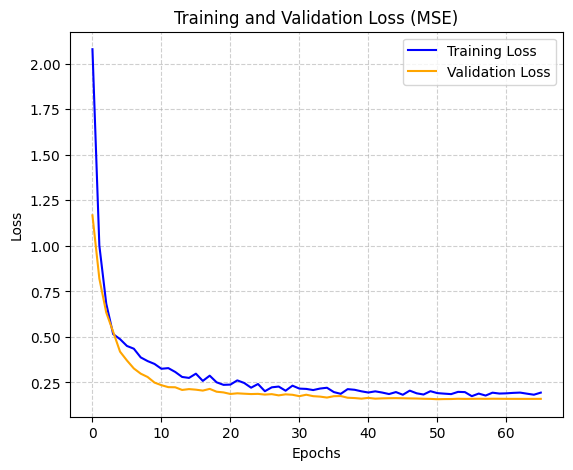

In [19]:
# 1. Plot Training & Validation History
plt.figure(figsize=(14, 5))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

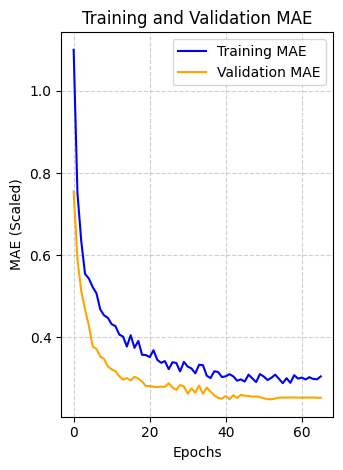

In [20]:
# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE', color='blue')
plt.plot(history.history['val_mae'], label='Validation MAE', color='orange')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE (Scaled)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

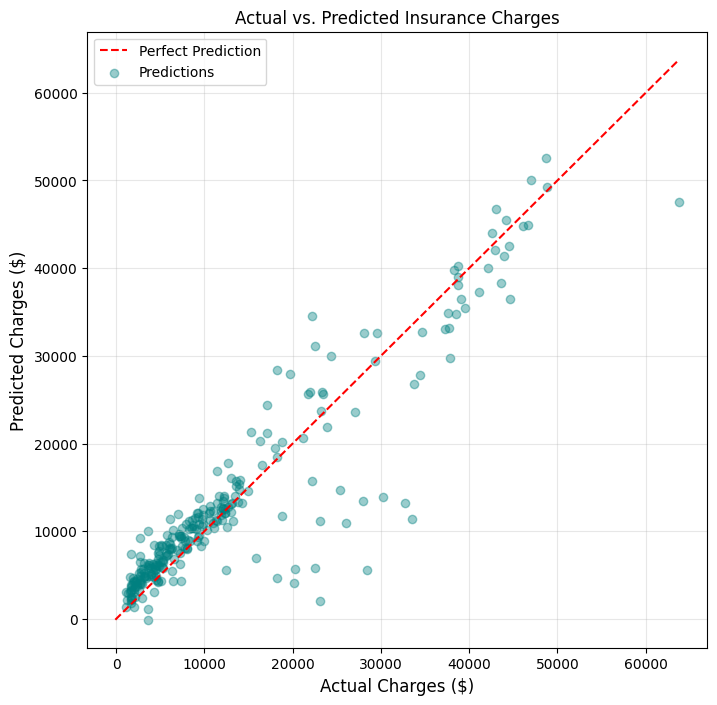

In [21]:
plt.figure(figsize=(8, 8))


# 1. The actual data points
plt.scatter(actual_dollars, predictions_dollars, alpha=0.4, color='teal', label='Predictions')

# 2. Make the "Perfect Prediction"
max_val = max(actual_dollars.max(), predictions_dollars.max())
min_val = min(actual_dollars.min(), predictions_dollars.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

# 3. make titles
plt.title('Actual vs. Predicted Insurance Charges')
plt.xlabel('Actual Charges (\$)', fontsize=12)
plt.ylabel('Predicted Charges (\$)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

## Part 6: Visualization and Analysis

### **Learning Curves Analysis**
* **Convergence:** The loss curves show a sharp initial decline, followed by a steady flattening. Both the training and validation loss curves follow each other closely, which indicates that the model is **generalizing well** and not suffering from significant overfitting.
* **Early Stopping Effect:** We can see that training stopped exactly when the validation loss ceased to improve, ensuring we kept the most efficient version of the model.

### **Prediction Accuracy Analysis**
* **Scatter Plot Observations:** The majority of the data points cluster tightly around the red "Perfect Prediction" line, especially for charges below \$15,000. 
* **Outlier Performance:** There are distinct groups in the scatter plot (likely representing smokers vs. non-smokers). While the model is very accurate for lower-cost patients, there is slightly more "spread" or variance for the highest-cost patients, which is expected given the complexity of high-cost medical cases.
* **Overall Fit:** The strong alignment with the diagonal line confirms that the features we used (age, BMI, smoking status) are powerful predictors of insurance costs.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great work with the visualization and analysis.

</div>

## Part 7: Final Conclusion

### **Project Overview**
The goal of this project was to build a deep learning regression model to predict individual medical insurance charges based on demographic and health factors. Using a dataset of **1,338 records**, we successfully developed a neural network capable of estimating costs with high accuracy.

### **Key Insights from Data Exploration**
* **The "Smoker" Factor:** Smoking status was identified early as the most significant predictor of high medical costs. The dataset was imbalanced (1,064 non-smokers vs. 274 smokers), which explains the right-skewed distribution of the target variable.
* **Feature Importance:** Variables like `bmi` and `age` also showed a clear positive correlation with increased insurance charges.

### **Model Performance**
* **Final Accuracy:** The model achieved a **Mean Absolute Error (MAE) of \$2,915.18** on the test set. 
* **Generalization:** By using **EarlyStopping** and **Dropout**, we ensured the model generalizes well to new data. The training and validation loss converged at **Epoch 40**, resulting in a stable, well-balanced architecture.
* **Visualization:** The "Actual vs. Predicted" scatter plot confirms that the model is highly reliable for predictions under \$15,000 and maintains a strong linear trend even for high-cost outliers.

### **Future Improvements**
* **Feature Engineering:** Creating an interaction term between `bmi` and `smoker` could potentially improve accuracy, as the combination of high BMI and smoking often leads to exponentially higher costs.
* **Dataset Expansion:** Incorporating more data on specific medical conditions or historical health records would likely refine the model's ability to predict high-cost outliers more precisely.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good conclusion.

</div>